In [2]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random 
import os

In [3]:
# Load your model
model = tf.keras.models.load_model("food_10_full_data")

In [4]:
# check the loaded function
dir(model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_cluster_coordinator',
 '_compile_wa

In [7]:
# Check model layer 
for no_layer,layer in enumerate(model.layers):
    print(f"{no_layer} : {layer.name} is trainable {layer.trainable}")

0 : input_layer is trainable True
1 : data_augmentation is trainable True
2 : efficientnetb0 is trainable True
3 : global_average_pooling_2D is trainable True
4 : dense is trainable True


In [17]:
test_dir = "./10_food_classes_all_data/test"

class_names = os.listdir(test_dir)
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [34]:
images = []
for label in class_names:
    class_dir = test_dir + "/" + label
    images.append(class_dir + "/" +random.choice(os.listdir(class_dir)))
images

['./10_food_classes_all_data/test/chicken_curry/392185.jpg',
 './10_food_classes_all_data/test/chicken_wings/1185396.jpg',
 './10_food_classes_all_data/test/fried_rice/2699922.jpg',
 './10_food_classes_all_data/test/grilled_salmon/3660336.jpg',
 './10_food_classes_all_data/test/hamburger/258503.jpg',
 './10_food_classes_all_data/test/ice_cream/2223225.jpg',
 './10_food_classes_all_data/test/pizza/398812.jpg',
 './10_food_classes_all_data/test/ramen/2772434.jpg',
 './10_food_classes_all_data/test/steak/2475366.jpg',
 './10_food_classes_all_data/test/sushi/858157.jpg']

In [39]:
images[0]

'./10_food_classes_all_data/test/chicken_curry/392185.jpg'

In [50]:
image_shape = 224

In [58]:
img = tf.io.read_file(images[0])

img_tensor = tf.image.decode_jpeg(img)

img_tensor = tf.image.resize(img_tensor,[image_shape,image_shape])

#img_tensor = img_tensor/255.0

#plt.imshow(img_tensor)


In [59]:
class_names[model.predict(tf.expand_dims(img_tensor,axis =0)).argmax()]

'chicken_curry'

In [62]:
def predict_image(model,class_names,image_path,image_shape = 224,scale = False,display = False):
    '''
    Read jpeg image and convert to tensor
    
    Arguments:
        model --- tensorflow machine learning model
        class_names --- classes name of the dataset
        image_path --- path to images
        image_shape --- shape of the images default (224x224)
        scale --- normalize image or not
        display --- display the image and result or not
    Return:
        pred_label --- label predicted
    '''
    # read the image
    img = tf.io.read_file(image_path)
    # convert to tensor
    img_tensor = tf.image.decode_jpeg(img)
    # resize image
    tensor = tf.image.resize(img_tensor,(image_shape,image_shape))
    # normalize tensor if scale == True
    if scale:
        tensor = tensor/255.
    # expand dims for image (1,height,width,color_channels)
    tensor = tf.expand_dims(tensor,axis = 0)
    # predict
    pred_label = class_names[model.predict(tensor).argmax()]
    # show display
    if display:
        plt.imshow(img_tensor)
        plt.title(pred_label)
        return pred_label
    else:
        return pred_label

'chicken_wings'

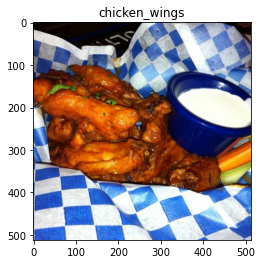

In [64]:
predict_image(model,class_names,images[1],display = True)

In [118]:
def random_predict_16(dataset_dir,model,class_names,image_shape = 224,scale = False,display = False):
    '''
    Read jpeg image and convert to tensor
    
    Arguments:
        dataset_dir --- directory of dataset
        model --- tensorflow machine learning model
        class_names --- classes name of the dataset
        image_shape --- shape of the images default (224x224)
        scale --- normalize image or not
        display --- display the image and result or not
    Return:
        Display image with label predicted
    '''
    images = []
    pred_labels = []
    for label in class_names:
        images = images + [ label + "/" + i for i in os.listdir(dataset_dir + "/" + label)]
    image_16 = random.choices(images,k = 16)
    plt.figure(figsize = (15,15))
    for i,image in enumerate(image_16):
        plt.subplot(4,4,i+1)      
        # read the image
        img = tf.io.read_file(dataset_dir + "/" +image)
        # convert to tensor
        img_tensor = tf.image.decode_jpeg(img)
        # resize image
        tensor = tf.image.resize(img_tensor,(image_shape,image_shape))
        # normalize tensor if scale == True
        if scale:
            tensor = tensor/255.
        # expand dims for image (1,height,width,color_channels)
        tensor = tf.expand_dims(tensor,axis = 0)
        # predict
        pred_label = class_names[model.predict(tensor).argmax()]
        plt.imshow(img_tensor)
        plt.title(pred_label)
    plt.tight_layout()

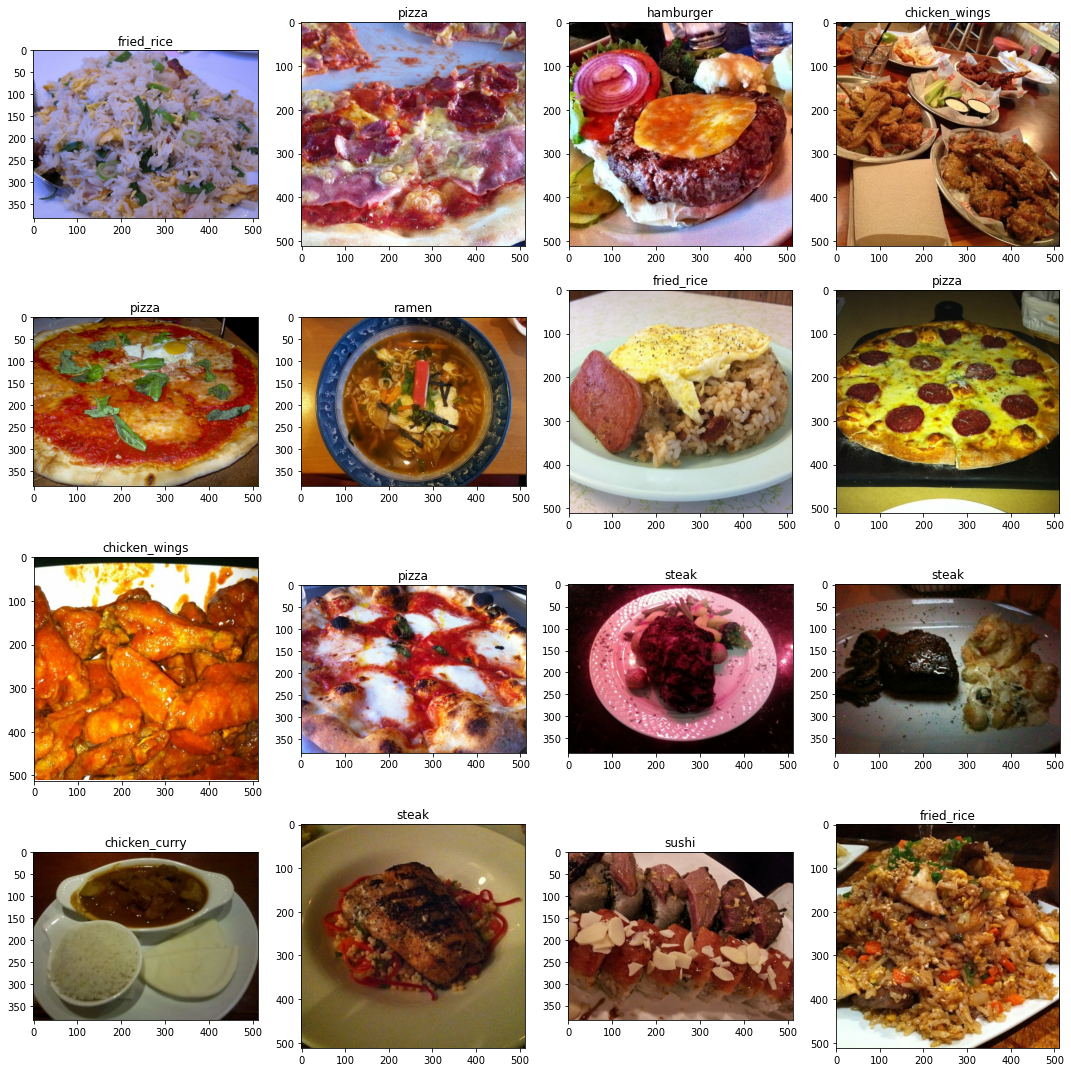

In [119]:
random_predict_16(test_dir,model,class_names,image_shape = 224,scale = False,display = False)